In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets

import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torch.utils.data import Dataset, DataLoader

import os
import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
from sklearn.preprocessing import LabelEncoder

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [3]:
train_data = pd.read_csv('./train.csv').drop(columns=['ID', '제품'])

In [4]:
train_data

,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,0,0,...,0,0,0,3,0,2,4,1,1,3
15887,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [17]:
df = train_data.iloc[:,4:]
df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,...,15880,15881,15882,15883,15884,15885,15886,15887,15888,15889
2022-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-04,0,0,0,0,0,0,7,0,15,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-05,0,0,0,0,0,0,21,0,16,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,0
2023-04-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
2023-04-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2023-04-03,0,2,0,0,0,0,0,0,0,0,...,0,1,1,2,0,0,1,0,0,0


In [26]:
(df.iloc[0,:] - mean)/std

0       -0.431333
1       -0.770896
2       -0.903099
3       -0.710862
4       -0.394384
           ...   
15885   -0.465665
15886   -0.558364
15887   -0.714147
15888   -0.816080
15889   -0.046676
Length: 15890, dtype: float64

In [18]:
mean = df.mean()
std = df.std()

for idx in range(len(df)) :
  print(idx, max((df.iloc[idx,:] - mean)/std))

0 21.377609282827663
1 18.14431067550082
2 12.315390587224835
3 15.091026477926802
4 15.09974101265447
5 21.377609282827663
6 21.051566137611932
7 15.09974101265447
8 21.377609282827663
9 15.09974101265447
10 12.113459606623358
11 19.61916262529714
12 15.09974101265447
13 21.377609282827663
14 10.524094475803311
15 21.377609282827663
16 21.377609282827663
17 10.51988643203065
18 12.315390587224833
19 15.09974101265447
20 13.67556719309857
21 15.09974101265447
22 21.377609282827663
23 21.377609282827663
24 21.377609282827663
25 21.377609282827663
26 15.09974101265447
27 21.377609282827663
28 15.09974101265447
29 12.5300472198515
30 15.09974101265447
31 21.37760928282766
32 17.23613134152528
33 15.09974101265447
34 17.448410497947997
35 15.099741012654466
36 12.3153905872248
37 15.099741012654466
38 21.37760928282766
39 12.31539058722483
40 12.661410206159914
41 21.37760928282766
42 21.377609282827656
43 21.377609282827656
44 21.377609282827656
45 21.377609282827656
46 21.377609282827656

373 21.377609282827624
374 15.099741012654418
375 21.377609282827624
376 21.377609282827624
377 21.377609282827624
378 15.099741012654414
379 21.373916821974223
380 15.099741012654414
381 15.099741012654414
382 12.033474224088032
383 15.099741012654414
384 15.099741012654414
385 15.099741012654466
386 10.65374012491565
387 10.65374012491565
388 10.65374012491565
389 10.044540412623514
390 10.65374012491565
391 21.37760928282762
392 15.099741012654414
393 21.37760928282762
394 14.626642685839027
395 15.03214304973879
396 15.099741012654434
397 21.37760928282762
398 21.37760928282762
399 21.27147077699303
400 12.315390587224767
401 21.37760928282762
402 21.220571679149124
403 15.09974101265441
404 15.09974101265441
405 12.315390587224766
406 12.315390587224766
407 21.37760928282762
408 21.37760928282762
409 11.410144326783966
410 15.09974101265441
411 21.37760928282762
412 15.099741012654421
413 17.789325552810908
414 16.584953396478376
415 15.567029455067791
416 21.37760928282762
417 21

In [27]:
mean = df.mean()
std = df.std()

for idx in range(len(df)) :
    df.iloc[idx,:][abs((df.iloc[idx,:] - mean)/std) > 8] = 1

df = df.transpose()
train_data.iloc[:,4:] = df
train_data.head(10)

,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,7,21,16,...,0,0,0,0,0,0,0,0,0,0
7,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
9,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# 데이터 크기 정규화

mean_dict = {}
std_dict = {}

for idx in tqdm(range(len(train_data))):
    mean = np.mean(train_data.iloc[idx,4:])
    std = np.std(train_data.iloc[idx,4:])

    if std == 0 :
        train_data.iloc[idx,4:] = 0
    else:
        train_data.iloc[idx,4:] = (train_data.iloc[idx,4:] - mean) / (std)

    mean_dict[idx] = mean
    std_dict[idx] = std

  0%|          | 0/15890 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
train_data

,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,-0.431804,-0.431804,-0.431804,-0.431804,-0.431804,-0.431804,...,-0.431804,-0.431804,-0.431804,-0.431804,-0.431804,-0.431804,-0.431804,-0.431804,-0.431804,-0.431804
1,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,-0.771737,-0.771737,-0.771737,-0.771737,-0.771737,-0.771737,...,-0.771737,-0.771737,-0.771737,-0.169310,1.035545,0.433118,-0.771737,-0.771737,0.433118,-0.771737
2,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,-0.904084,-0.904084,-0.904084,-0.904084,-0.904084,-0.904084,...,-0.904084,-0.904084,-0.904084,-0.904084,-0.904084,-0.904084,-0.904084,-0.904084,-0.904084,-0.904084
3,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,-0.711637,-0.711637,-0.711637,-0.711637,-0.711637,-0.711637,...,-0.711637,-0.711637,-0.711637,-0.711637,-0.711637,-0.711637,-0.711637,-0.711637,-0.711637,-0.711637
4,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,-0.394814,-0.394814,-0.394814,-0.394814,-0.394814,-0.394814,...,-0.394814,-0.394814,-0.394814,-0.394814,-0.394814,-0.394814,-0.394814,-0.394814,-0.394814,-0.394814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,-0.466174,-0.466174,-0.466174,-0.466174,-0.466174,-0.466174,...,-0.466174,-0.466174,-0.466174,-0.466174,-0.466174,-0.466174,-0.466174,-0.466174,-0.466174,-0.466174
15886,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,-0.558973,-0.558973,-0.558973,-0.558973,-0.558973,-0.558973,...,-0.558973,-0.558973,-0.558973,-0.146704,-0.558973,-0.284127,-0.009281,-0.421550,-0.421550,-0.146704
15887,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,-0.714926,-0.714926,-0.714926,-0.714926,-0.714926,-0.714926,...,-0.714926,-0.714926,-0.714926,-0.714926,-0.714926,-0.714926,-0.714926,-0.714926,-0.714926,-0.714926
15888,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,-0.816970,-0.816970,-0.816970,-0.816970,-0.816970,-0.816970,...,-0.816970,-0.816970,-0.816970,-0.816970,-0.816970,-0.816970,-0.816970,-0.816970,-0.816970,-0.107435


In [ ]:
vocab = []
for i in tqdm(range(15890)):
  for j in range(0,4):
    if train_data.iloc[i,j] not in vocab:
      vocab.append(train_data.iloc[i,j])

  0%|          | 0/15890 [00:00<?, ?it/s]

In [ ]:
word_2_index = {}
for index, word in enumerate(vocab):
  word_2_index[word] = index

In [ ]:
print(word_2_index)

{'B002-C001-0002': 0, 'B002-C002-0007': 1, 'B002-C003-0038': 2, 'B002-00001': 3, 'B002-C001-0003': 4, 'B002-C002-0008': 5, 'B002-C003-0044': 6, 'B002-00002': 7, 'B002-C001-0001': 8, 'B002-C002-0001': 9, 'B002-C003-0003': 10, 'B002-00003': 11, 'B002-C002-0006': 12, 'B002-C003-0032': 13, 'B002-00005': 14, 'B002-C003-0034': 15, 'B002-C003-0039': 16, 'B002-C002-0004': 17, 'B002-C003-0019': 18, 'B002-00006': 19, 'B002-C002-0005': 20, 'B002-C003-0025': 21, 'B002-00007': 22, 'B002-C003-0001': 23, 'B002-00008': 24, 'B002-C003-0004': 25, 'B002-00009': 26, 'B002-C003-0036': 27, 'B002-00010': 28, 'B002-C003-0005': 29, 'B002-00011': 30, 'B002-00012': 31, 'B002-00013': 32, 'B002-00015': 33, 'B002-C002-0003': 34, 'B002-C003-0012': 35, 'B002-00016': 36, 'B002-00017': 37, 'B002-00018': 38, 'B002-C002-0002': 39, 'B002-C003-0011': 40, 'B002-00020': 41, 'B002-00021': 42, 'B002-00022': 43, 'B002-C003-0016': 44, 'B002-00024': 45, 'B002-C003-0009': 46, 'B002-00025': 47, 'B002-00026': 48, 'B002-C003-0010': 4

In [ ]:
for i in range(15890):
  for j in range(0, 4):
    train_data.iloc[i,j] = word_2_index[train_data.iloc[i,j]]

In [ ]:
print(len(vocab))

3239


In [ ]:
train_data.head(20)

,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,1,2,3,-0.431804,-0.431804,-0.431804,-0.431804,-0.431804,-0.431804,...,-0.431804,-0.431804,-0.431804,-0.431804,-0.431804,-0.431804,-0.431804,-0.431804,-0.431804,-0.431804
1,4,5,6,7,-0.771737,-0.771737,-0.771737,-0.771737,-0.771737,-0.771737,...,-0.771737,-0.771737,-0.771737,-0.169310,1.035545,0.433118,-0.771737,-0.771737,0.433118,-0.771737
2,4,5,6,7,-0.904084,-0.904084,-0.904084,-0.904084,-0.904084,-0.904084,...,-0.904084,-0.904084,-0.904084,-0.904084,-0.904084,-0.904084,-0.904084,-0.904084,-0.904084,-0.904084
3,4,5,6,7,-0.711637,-0.711637,-0.711637,-0.711637,-0.711637,-0.711637,...,-0.711637,-0.711637,-0.711637,-0.711637,-0.711637,-0.711637,-0.711637,-0.711637,-0.711637,-0.711637
4,8,9,10,11,-0.394814,-0.394814,-0.394814,-0.394814,-0.394814,-0.394814,...,-0.394814,-0.394814,-0.394814,-0.394814,-0.394814,-0.394814,-0.394814,-0.394814,-0.394814,-0.394814
5,8,9,10,11,-0.667271,-0.667271,-0.667271,-0.667271,-0.667271,-0.667271,...,-0.667271,-0.667271,-0.667271,-0.667271,-0.667271,-0.667271,-0.667271,-0.667271,-0.667271,-0.667271
6,8,9,10,11,-0.518316,-0.518316,-0.518316,0.819314,3.494575,2.539124,...,-0.518316,-0.518316,-0.518316,-0.518316,-0.518316,-0.518316,-0.518316,-0.518316,-0.518316,-0.518316
7,8,9,10,11,-0.733874,-0.733874,-0.733874,-0.733874,-0.733874,-0.733874,...,-0.733874,-0.733874,-0.733874,-0.733874,-0.733874,-0.733874,-0.733874,-0.733874,-0.733874,-0.733874
8,8,9,10,11,-0.287592,-0.287592,-0.287592,8.138249,8.699971,0.274130,...,-0.287592,-0.287592,-0.287592,-0.287592,-0.287592,-0.287592,-0.287592,-0.287592,-0.287592,0.274130
9,8,9,10,11,-0.699918,-0.699918,-0.699918,-0.699918,-0.699918,-0.699918,...,-0.699918,-0.699918,-0.699918,-0.699918,-0.699918,-0.699918,-0.699918,-0.699918,-0.699918,-0.699918


In [ ]:
def time2num(time_list):
  num_list = []
  for i in range(len(time_list)):
    time = time_list[i].split("-")
    num = (int(time[1])-1)*31 + (int(time[2]))
    num_list.append(num)
  return num_list

In [ ]:
from tqdm import tqdm
x_train = []
y_train = []
z_train = []

total_sequence = 42
columns = train_data.columns.to_list()
k = 15890
for i in tqdm((range(15890))):
  present_df = train_data.iloc[i]
  x = [present_df['대분류'], present_df['중분류'], present_df['소분류'], present_df['브랜드']]
  for j in range(4, 463-42):
      y = present_df[j:j+21]
      z = present_df[j+21:j+42] # Z가 정답데이터
      x2 = columns[j+21:j+42]
      x2 = time2num(x2)
      x1 = x+x2
      x_train.append(x1) # x : 카테고리 정수형 + 22일 ~ 42일 날짜 정수형 (25)
      y_train.append(y)  # y : 1일 ~ 21일 판매량 (21)
      z_train.append(z)  # z : 22일 ~ 42일 판매량 (21)

x_train = np.array(x_train)
y_train = np.array(y_train).reshape(-1,1,21)
z_train = np.array(z_train).reshape(-1,21,1)

x_train = x_train.astype(np.int64)
y_train = y_train.astype(np.int64)
z_train = z_train.astype(np.int64)

print("\n")
print(x_train.shape)
print(y_train.shape)
print(z_train.shape)

100%|██████████| 15890/15890 [10:40<00:00, 24.80it/s]




(6626130, 25)
(6626130, 1, 21)
(6626130, 21, 1)


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/LGAimers3_dacon/sample_submission.csv')

In [ ]:
columns_t = test_df.columns.to_list()

x_test = []
y_test = []

for i in tqdm(range(15890)):
    present_df = train_data.iloc[i]
    x1_t = [present_df['대분류'], present_df['중분류'], present_df['소분류'], present_df['브랜드']]
    y_t = present_df[-21:] # 23년 3월 15일 ~ 4월 4일 까지의 판매량
    x2_t = columns_t[1:22]
    x2_t = time2num(x2_t)
    x_t = x1_t + x2_t # 제품별 카테고리 정수형 + 예측 해야하는 날짜 정수형
    x_test.append(x_t)
    y_test.append(y_t)

x_test = np.array(x_test)
y_test = np.array(y_test).reshape(-1,1,21)
x_test = x_test.astype(np.int64)
y_test = y_test.astype(np.int64)

print(x_test.shape)
print(y_test.shape)

100%|██████████| 15890/15890 [00:12<00:00, 1293.44it/s]


(15890, 25)
(15890, 1, 21)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val = train_test_split(x_train, test_size = 0.2, random_state=0)
y_train, y_val = train_test_split(y_train, test_size = 0.2, random_state=0)
z_train, z_val = train_test_split(z_train, test_size = 0.2, random_state=0)

In [ ]:
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더
batch = 128

trainX_tensor = torch.LongTensor(x_train).cuda()
trainY_tensor = torch.FloatTensor(y_train).cuda()
trainZ_tensor = torch.FloatTensor(z_train).cuda()

valX_tensor = torch.LongTensor(x_val).cuda()
valY_tensor = torch.FloatTensor(y_val).cuda()
valZ_tensor = torch.FloatTensor(z_val).cuda()

testX_tensor = torch.LongTensor(x_test).cuda()
testY_tensor = torch.FloatTensor(y_test).cuda()

train_dataset = TensorDataset(trainX_tensor,trainY_tensor, trainZ_tensor)
val_dataset = TensorDataset(valX_tensor, valY_tensor, valZ_tensor)

train_dataloader = DataLoader(train_dataset,batch_size=batch, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch, shuffle=False, drop_last=True)

In [ ]:
# 설정값
input_dim = 21
encoder_hidden_dim = 64
decoder_hidden_dim = 64
output_dim = 1

class encoder(nn.Module):
    # 기본변수, layer를 초기화해주는 생성자
    def __init__(self, input_dim, encoder_hidden_dim, decoder_hidden_dim):
        super(encoder, self).__init__()
        self.embedding_layer1 = nn.Embedding(num_embeddings=3239+1, embedding_dim=21)
        self.embedding_layer2 = nn.Embedding(num_embeddings=12*31+1, embedding_dim=21)

        self.rnn = nn.GRU(input_dim, encoder_hidden_dim,dropout = 0.15, batch_first=True, bidirectional =True)
        self.fc = nn.Linear(encoder_hidden_dim*2, decoder_hidden_dim)

    # 예측을 위한 함수
    def forward(self, x, y):
        x1 = x[:,:4]
        x2 = x[:,4:]
        x1 = self.embedding_layer1(x1)
        x2 = self.embedding_layer2(x2)
        x = torch.cat([x1, x2], dim = 1)
        x = torch.cat([x, y], dim = 1)
        outputs, hidden = self.rnn(x)  # hidden.shape = (1, batch_size, hidden_vector_size), output.shape = (batch_size, seq_length, hidden_vector_size) -> bidirectional 안했을때의 사이즈!!
        hidden = torch.tanh(self.fc(torch.cat((hidden[-2,:,:],hidden[-1,:,:]),dim = 1))) # bidirectional을 해서 hidden이 2개가 나와서 concat하고 fc거쳐서 decoder_hidden에 맞춘다.
        return outputs, hidden.unsqueeze(0)

class Attention(nn.Module):
    def __init__(self, encoder_hidden_dim, decoder_hidden_dim):
        super().__init__()
        self.attention = nn.Linear(encoder_hidden_dim*2 + decoder_hidden_dim, decoder_hidden_dim)
        self.v = nn.Linear(decoder_hidden_dim, 1, bias = False)

    def forward(self, hidden, encoder_outputs):

        # hidden = [배치 사이즈, 디코더 히든 차원]
        # encoder_outputs = [배치사이즈, 단어 개수, 인코더 히든 차원*2]

        batch_size = encoder_outputs.shape[0] # 배치 사이즈
        src_len = encoder_outputs.shape[1] # 단어 개수

        hidden = hidden.reshape(batch_size, 1, -1) # (batch_size, 1, 디코더 히든 차원) -1이 나머지 차원 떄려박는 거
        hidden = hidden.repeat(1, src_len, 1) # (batch_size, 1, 디코더 히든 차원) -> (batch_size, seq_len, 디코더 히든 차원) seq_len만큼 hidden 유사도 계산해야되서 갯수 더 늘리는거

        # hidden = [배치 사이즈, 단어 개수(seq_len), 디코더 히든 차원]   *여기서 히든은 유사도계산의 기준이되는 디코더의 히든인데 근데 이건 첫번째 단계이기떄문에 인코더의 마지막히든임
        # encoder_outputs = [ 배치 사이즈, 단어 개수,인코더 히든 차원]

        # 바다나우 어텐션
        energy = torch.tanh(self.attention(torch.cat([hidden, encoder_outputs], dim = 2)))
        # energy = [배치사이즈, 단어 개수, 디코더 히든 차원]

        # softmax 정규화
        attention = self.v(energy).squeeze(2)
        # attention = [배치사이즈, 단어개수, 1] -> [배치사이즈, 단어개수]

        return F.softmax(attention, dim=1)

class decoder(nn.Module):
    # # 기본변수, layer를 초기화해주는 생성자
    def __init__(self, decoder_input_dim, decoder_output_dim, encoder_hidden_dim, decoder_hidden_dim, attention): # 여기 attention -> 위에있는 class Attention
        super(decoder, self).__init__()
        self.decoder_output_dim = decoder_output_dim
        self.attention = attention

        self.rnn = nn.GRU(decoder_input_dim+ encoder_hidden_dim*2, decoder_hidden_dim, batch_first=True)
        self.fc_out = nn.Linear(encoder_hidden_dim*2 + decoder_hidden_dim + decoder_input_dim, decoder_output_dim)

    # 예측을 위한 함수
    def forward(self, input, hidden, encoder_outputs): # input : 디코더 인풋(batch_size, 1, decoder_input_vector_size), hidden : 디코더 히든 사이즈

        a = self.attention(hidden, encoder_outputs) # a.shape = (batch_size, en_seq)
        a = a.unsqueeze(1) # a.shape = (batch_size, 1, en_seq) -> attention 가중치들
        weighted = torch.bmm(a, encoder_outputs) # bmm : batch별로 행렬 곱하기 -> (batch_size, 1, en_seq) * (batch_size, en_seq, en_hidden) -> (batch_size, 1, en_hidden) -> encoder에서 뭘 중점적으로 볼지의 가중치가 나옴

        rnn_input = torch.cat([input, weighted], dim = 2)

        output, hidden = self.rnn(rnn_input, hidden)

        assert (output == hidden.permute(1,0,2)).all()

        input = input.squeeze(1)        # input : (batch,1,vector_size)
        output = output.squeeze(1)      # output : (batch,1,decoder_hidden)
        weighted = weighted.squeeze(1)  # weight : (batch,1,en_seq)

        prediction = F.relu(self.fc_out(torch.cat([output, weighted, input], dim = 1)))
        prediction = prediction.reshape(encoder_outputs.shape[0], 1, self.decoder_output_dim) # 앞에서 fc 돌릴려고 squeeze 해줬던거 다시 unsqueeze 해주는 느낌
        return prediction, hidden

In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device, teacher_forcing_ratio):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        self.teacher_forcing_ratio = teacher_forcing_ratio

    def forward(self, encoder_input1, encoder_input2, decoder_input):

        batch_size = encoder_input1.shape[0]
        dec_len = 21

        # outputs = torch.zeros(encoder_input.shape[0], encoder_input.shape[1], 72).to(self.device)

        encoder_outputs, hidden = self.encoder(encoder_input1, encoder_input2)

        outputs = torch.empty(batch_size, 0, 1).cuda()
        # input = encoder_input[:,-1,[-1]].unsqueeze(1).to(self.device)

        input = torch.zeros(batch_size, 1, 1).to(self.device)
        for i in range(0,dec_len):
            output, hidden = self.decoder(input, hidden, encoder_outputs)

            outputs = torch.cat([outputs,output],dim=1)

            # teacher forcing을 사용할지, 말지 결정
            if self.teacher_forcing_ratio != 0:
                teacher_force = random.random() < self.teacher_forcing_ratio
                input = decoder_input[:,i,[-1]].unsqueeze(1) if teacher_force else output
            elif self.teacher_forcing_ratio == 0:
                input = output

        return outputs

In [ ]:
import time

def train():
    start_time = time.time()
    print(f'[Epoch: {epoch + 1} - Training]')
    model.train()

    total = 0
    running_loss = 0.0

    for i, batch in enumerate(train_dataloader):
        x, y, z = batch
        x, y, z = x.cuda(),y.cuda(), z.cuda()

        output = model(x, y, z)

        optimizer.zero_grad()

        loss = criterion(output, z)

        loss.backward()
        optimizer.step()

        total += 1
        running_loss += loss.item()

    print(f'train loss: {running_loss / total}')
    print("elapsed time:", time.time() - start_time)
    return running_loss/total

def validate():
    start_time = time.time()
    print(f'[Epoch: {epoch + 1} - Training]')
    model.eval()

    total = 0
    running_loss = 0.0

    for i, batch in enumerate(val_dataloader):
        x, y, z = batch
        x, y, z = x.cuda(), y.cuda(), z.cuda()

        with torch.no_grad():
          output = model(x, y, z)
          loss = criterion(output, z)


        total += 1
        running_loss += loss.item()
    print(f'val loss: {running_loss / total}')
    print("elapsed time:", time.time() - start_time)
    return running_loss/total

def test():
    start_time = time.time()
    print(f'[Epoch: {epoch + 1} - Training]')
    model.eval()

    total = 0
    running_loss = 0.0

    for i, batch in enumerate(val_dataloader):
        x, y, z = batch
        x, y, z = x.cuda(),y.cuda(), z.cuda()

        with torch.no_grad():
          output = model(x, y,z)
          loss = criterion(output, z)

        total += 1
        running_loss += loss.item()
    print(f'test loss: {running_loss / total}')
    print("elapsed time:", time.time() - start_time)
    return running_loss/total

In [ ]:
enc = encoder(input_dim, encoder_hidden_dim, decoder_hidden_dim).cuda()
attention = Attention(encoder_hidden_dim, decoder_hidden_dim).cuda()
dec = decoder(1, 1,  encoder_hidden_dim, decoder_hidden_dim, attention).cuda()
model = Seq2Seq(enc, dec, device, 0.5).to(device)
model = model.cuda()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.15 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


[Epoch: 1 - Training]
train loss: 0.38813894206641275
elapsed time: 947.0047526359558
[Epoch: 1 - Training]
val loss: 0.3896758427592988
elapsed time: 112.48229575157166
[Info] best validation loss!
[Epoch: 2 - Training]
train loss: 0.3862116520276775
elapsed time: 948.736790895462
[Epoch: 2 - Training]
val loss: 0.3880297804893307
elapsed time: 114.83212518692017
[Info] best validation loss!
[Epoch: 3 - Training]
train loss: 0.3842533341226895
elapsed time: 947.3255889415741
[Epoch: 3 - Training]
val loss: 0.386705346327776
elapsed time: 111.94001817703247
[Info] best validation loss!
[Epoch: 4 - Training]
train loss: 0.38311574303026097
elapsed time: 938.010294675827
[Epoch: 4 - Training]
val loss: 0.3857681242780763
elapsed time: 112.65982985496521
[Info] best validation loss!
[Epoch: 5 - Training]
train loss: 0.3820382873988734
elapsed time: 940.6473777294159
[Epoch: 5 - Training]
val loss: 0.3847228668347991
elapsed time: 114.82232451438904
[Info] best validation loss!
[Epoch: 6 -

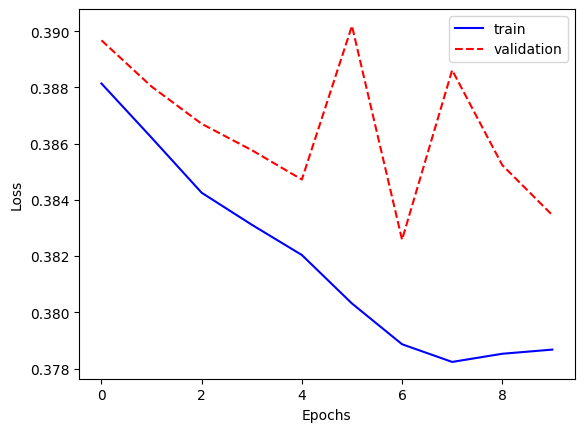

In [ ]:
learning_rate = 0.001

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 10
best_epoch = 0
verbose = 1
patience = 4
best_val_loss = 10**9

history = []

for epoch in range(num_epochs):
    train_loss = train()
    val_loss = validate()
    history.append((train_loss, val_loss))

    if val_loss < best_val_loss:
        print("[Info] best validation loss!")
        best_val_loss = val_loss
        best_epoch = epoch
        torch.save(model.state_dict(), "/content/drive/MyDrive/LGAimers3_dacon/best_checkpoint.pth")

torch.save(model.state_dict(), f"/content/drive/MyDrive/LGAimers3_dacon/last_checkpoint_epoch_{num_epochs}.pth")

plt.plot([x[0] for x in history], 'b', label='train')
plt.plot([x[1] for x in history], 'r--',label='validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# test_loss = test()
# print(f"Test loss: {test_loss: .8f}")

In [ ]:
out = []
model2 = Seq2Seq(enc, dec, device, 0).to(device)
model2.load_state_dict(torch.load("/content/drive/MyDrive/LGAimers3_dacon/best_checkpoint.pth"))

output = model2(testX_tensor, testY_tensor, 0)
output = output.cpu().detach().numpy()

In [ ]:
output

array([[[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.2559418 ],
        [0.263371  ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       ...,

       [[0.        ],
        [0.18271047],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.18271047],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.08244655],
        [0.0553381 ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]], dtype=float32)

In [ ]:
np.shape(actual), np.shape(out)

((542976,), (542976,))

[0.00217865 0.00217865 0.00217865 ... 0.00217865 0.00217865 0.00217865]
542976 542976 542976


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


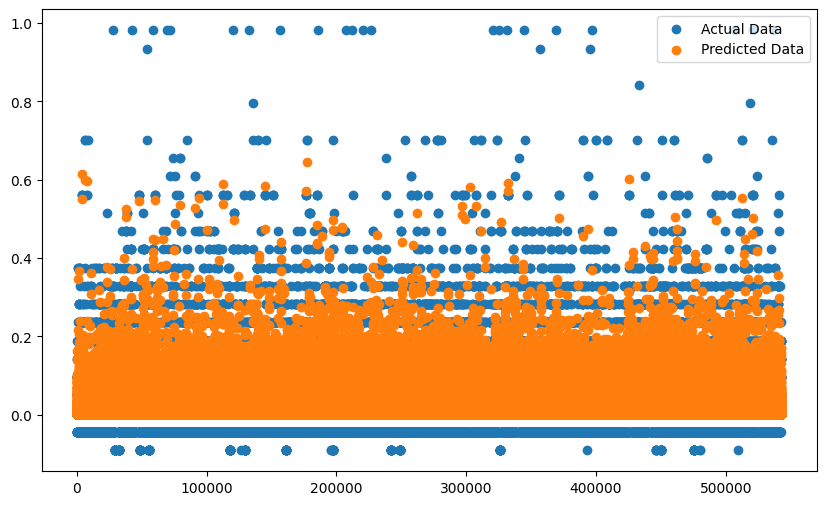

In [ ]:
out = []
actual = []
model2 = Seq2Seq(enc, dec, device, 0).to(device)
model2.load_state_dict(torch.load("/content/drive/MyDrive/LGAimers3_dacon/best_checkpoint.pth"))

for i, batch in enumerate(val_dataloader):
    x, y, z = batch
    x, y, z = x.cuda(), y.cuda(), z.cuda()
    output = model(x,y,z)
    actual.append(z.cpu().detach().numpy().reshape(-1,))
    out.append(output.cpu().detach().numpy().reshape(-1,))
    if i == 100:
      break

actual = np.array(actual).reshape(-1,)*(std)+mean

out = np.array(out).reshape(-1,)*(std)+mean

len_72 = []
for i in range(542976) :
  len_72.append(i+1)

print(actual)
print(len(len_72), len(actual), len(out))

plt.figure(figsize=(10, 6))
plt.scatter(len_72, actual, label='Actual Data')
plt.scatter(len_72, out, label='Predicted Data')
plt.legend()
plt.show()

In [ ]:
out = []
model2 = Seq2Seq(enc, dec, device, 0).to(device)
model2.load_state_dict(torch.load("/content/drive/MyDrive/LGAimers3_dacon/best_checkpoint.pth"))

output = model2(testX_tensor, testY_tensor, 0)
output = output.cpu().detach().numpy()

# 추론 결과를 inverse scaling
for idx in range(len(output)):
    output[idx, :] = output[idx, :] * (std_dict[idx]) + mean_dict[idx]

# 결과 후처리
pred = np.round(output, 0).astype(int)

In [ ]:
pred = pred.reshape(15890,21)

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/LGAimers3_dacon/sample_submission.csv')

In [ ]:
submit.iloc[:,1:] = pred

In [ ]:
submit

,ID,2023-04-05,2023-04-06,2023-04-07,2023-04-08,2023-04-09,2023-04-10,2023-04-11,2023-04-12,2023-04-13,...,2023-04-16,2023-04-17,2023-04-18,2023-04-19,2023-04-20,2023-04-21,2023-04-22,2023-04-23,2023-04-24,2023-04-25
0,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,2,2,2,2,1,1,1,2,...,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,4,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,13,14,16,16,16,13,13,13,13,...,13,13,13,13,15,13,13,13,13,13
15886,15886,4,5,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
15887,15887,4,5,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
15888,15888,2,3,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [ ]:
submit.to_csv('./baseline_submit_seq2seq_4.csv', index=False)

In [ ]:
path = '/content/drive/MyDrive/LGAimers3_dacon/best_checkpoint.pth'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
model

Seq2Seq(
  (encoder): encoder(
    (embedding_layer1): Embedding(3240, 21)
    (embedding_layer2): Embedding(373, 21)
    (rnn): GRU(21, 64, batch_first=True, dropout=0.15, bidirectional=True)
    (fc): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): decoder(
    (attention): Attention(
      (attention): Linear(in_features=192, out_features=64, bias=True)
      (v): Linear(in_features=64, out_features=1, bias=False)
    )
    (rnn): GRU(129, 64, batch_first=True)
    (fc_out): Linear(in_features=193, out_features=1, bias=True)
  )
)

In [ ]:
model = model.cuda()